In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

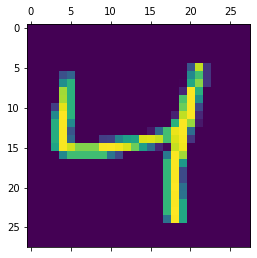

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
type(X_train)
len(X_train)

60000

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
#After scaling
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4673 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9258


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9267


[0.26643338799476624, 0.9266999959945679]

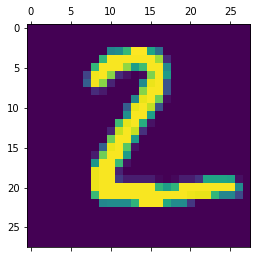

In [20]:
plt.matshow(X_test[1])

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 1ms/step


array([4.1600639e-01, 7.2282497e-03, 9.9939674e-01, 3.6877152e-01,
       4.0441478e-10, 8.4302408e-01, 8.3137774e-01, 9.4214198e-13,
       1.7193517e-01, 2.4828093e-09], dtype=float32)

In [22]:
np.argmax(y_predicted[1])

2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    5,    2,    4,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   10,  915,   17,    6,    4,   12,   10,   48,    4],
       [   4,    0,   17,  922,    0,   21,    2,   10,   27,    7],
       [   1,    1,    4,    1,  910,    0,   10,    4,   10,   41],
       [   8,    3,    2,   32,    8,  771,   15,    5,   41,    7],
       [  10,    3,    7,    1,    7,   12,  913,    2,    3,    0],
       [   1,    8,   21,    8,    7,    0,    0,  941,    4,   38],
       [   5,   11,    6,   18,    9,   19,    8,    7,  884,    7],
       [  10,    7,    1,    8,   17,    5,    0,   18,   13,  930]])>

Text(69.0, 0.5, 'Truth')

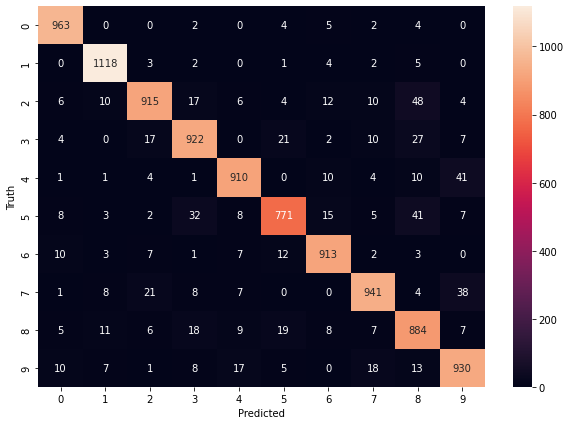

In [26]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2764 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1235 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0517 - accuracy: 0.9843


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9744


[0.080644391477108, 0.974399983882904]

Text(69.0, 0.5, 'Truth')

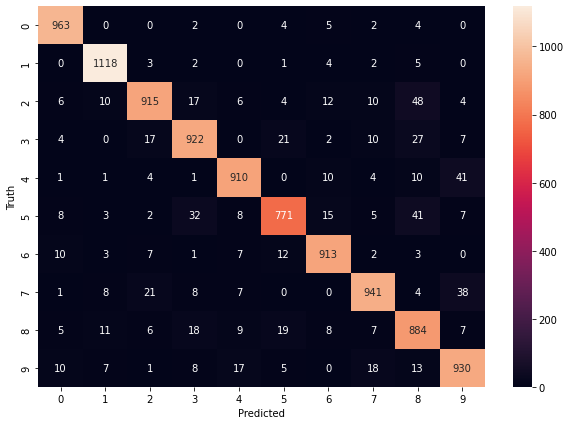

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1887 - accuracy: 0.9436
Epoch 2/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0749 - accuracy: 0.9767
Epoch 3/6
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0483 - accuracy: 0.9843
Epoch 4/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0329 - accuracy: 0.9896
Epoch 5/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 6/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0192 - accuracy: 0.9938


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9796


[0.07585474103689194, 0.9796000123023987]

Text(69.0, 0.5, 'Truth')

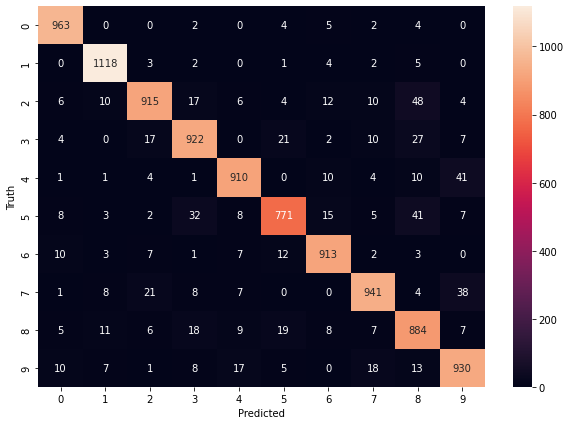

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')